In [51]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm 
from arjun_plot.utils import *

%matplotlib inline

In [52]:
def p_aneuploid():
    """Return the probability of a specific aneuploidy type."""
    return np.array([0.4, 0.05, 0.1, 0.05, 0.4])

def p_failed_implantation():
    """The probability of failed implantation conditional on aneuploidy type."""
    return np.array([0.8, 1.0, 0.4, 0.5, 0.05])

def p_epl_implantation(eta=1e-2, eps=1e-1):
    assert eta < 1.0
    assert eps < 1.0
    return np.array([1.-eta, 1.-eta, 0.2, 0.5, eps])

In [53]:
# Approximate probability of aneuploidy as a function of maternal age
# This is the probability of implantation ... 
(1.0 - (p_aneuploid() * p_failed_implantation()))

array([0.68 , 0.95 , 0.96 , 0.975, 0.98 ])

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 4962.26it/s]


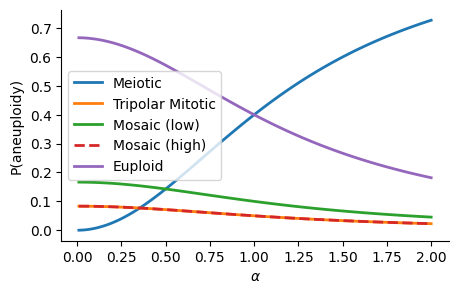

In [57]:
alphas = np.linspace(0.01, 2.0, 100)
test = []
for a in tqdm(alphas):
    p_trans = p_aneuploid() * np.array([a, 1.0/a, 1.0/a, 1.0/a, 1.0/a])
    p_trans /= p_trans.sum()
    assert np.isclose(np.sum(p_trans), 1.0)
    test.append(p_trans)

p_aneuploid_realized = np.vstack(test)

fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(alphas, p_aneuploid_realized[:,0], label=r'Meiotic', lw=2);
ax.plot(alphas, p_aneuploid_realized[:,1], label=r'Tripolar Mitotic', lw=2);
ax.plot(alphas, p_aneuploid_realized[:,2], label=r'Mosaic (low)', lw=2);
ax.plot(alphas, p_aneuploid_realized[:,3], label=r'Mosaic (high)', linestyle='--', lw=2);
ax.plot(alphas, p_aneuploid_realized[:,4], label=r'Euploid', lw=2)
ax.legend()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'P(aneuploidy)')
debox(ax)

100%|███████████████████████████████████████| 200/200 [00:00<00:00, 7130.62it/s]


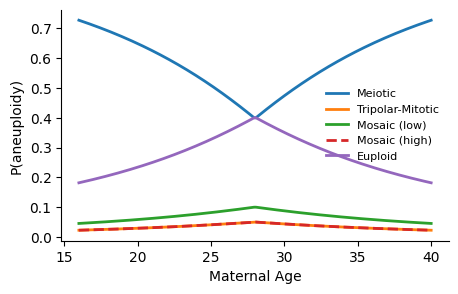

In [72]:
npts = 100
alphas_test = np.linspace(2.0, 1.0, npts) 
alphas = np.append(alphas_test,alphas_test[::-1])
ages = np.linspace(16, 40, 2*npts)
assert ages.size == alphas.size
test = []
for a in tqdm(alphas):
    p_trans = p_aneuploid() * np.array([a, 1.0/a, 1.0/a, 1.0/a, 1.0/a])
    p_trans /= p_trans.sum()
    assert np.isclose(np.sum(p_trans), 1.0)
    test.append(p_trans)
    
p_aneuploid_realized = np.vstack(test)

fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(ages, p_aneuploid_realized[:,0], label=r'Meiotic', lw=2);
ax.plot(ages, p_aneuploid_realized[:,1], label=r'Tripolar-Mitotic', lw=2);
ax.plot(ages, p_aneuploid_realized[:,2], label=r'Mosaic (low)', lw=2);
ax.plot(ages, p_aneuploid_realized[:,3], label=r'Mosaic (high)', linestyle='--', lw=2);
ax.plot(ages, p_aneuploid_realized[:,4], label=r'Euploid', lw=2)
ax.legend(frameon=False, fontsize=8)
ax.set_xlabel(r'Maternal Age')
ax.set_ylabel(r'P(aneuploidy)')
debox(ax)

In [ ]:
# NOTE: need some function to describe the relative odds $alpha$ as a function of maternal age ... 
